# 1- Load the required modules

In [41]:
import numpy as np                     # Llibreria matemÃ tica
import pandas as pd
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb         # Per fer servir el knn
%matplotlib inline

# 2- Load the dataset

In [42]:
twigen = pd.read_csv("datapreprocessed.csv", encoding='latin1')
twigen.head()

,gender,created,description_length,fav_number,link_color,name_length,retweet_count,sidebar_color,text_length,tweet_coord,tweet_count,tweet_created,tweet_location,user_timezone
0,male,early_morning,21,0,cyan,7,0,white,109,False,110964,midday,Unknown,Chennai
1,male,midday,62,68,gray,11,0,white,139,False,7471,midday,Unknown,Eastern Time (US & Canada)
2,male,morning,35,7696,gray,14,1,white,80,False,5617,midday,India,Belgrade
3,male,evening,146,202,gray,11,0,white,138,False,1693,midday,United States,Pacific Time (US & Canada)
4,female,midday,160,37318,lightblue,12,0,black,95,False,31462,midday,Unknown,Unknown


# 3- Pre-processing

## Expand categoric variables to binary values

In [43]:
def expand_categoric_column_with_binary_values(column_name):
    global twigen
    print(column_name)
    print(twigen[column_name].unique())
    twigen = pd.concat([
            twigen.drop(column_name, axis=1),
            pd.get_dummies(twigen[column_name], prefix=column_name, sparse=True)
        ], axis=1)

expand_categoric_column_with_binary_values('created')
expand_categoric_column_with_binary_values('tweet_created')
expand_categoric_column_with_binary_values('link_color')
expand_categoric_column_with_binary_values('sidebar_color')
expand_categoric_column_with_binary_values('tweet_location')
expand_categoric_column_with_binary_values('user_timezone')

twigen.info()
print(twigen.columns)
twigen.head()

created
['early_morning' 'midday' 'morning' 'evening' 'afternoon']
tweet_created
['midday']
link_color
['cyan' 'gray' 'lightblue' 'lightred' 'blue' 'black' 'violet' 'red'
 'orange' 'brown' 'green' 'lightgreen' 'white' 'yellow']
sidebar_color
['white' 'black' 'lightblue' 'orange' 'lightgreen' 'gray' 'lightred' 'cyan'
 'red' 'brown' 'blue' 'yellow' 'violet' 'green']
tweet_location
['Unknown' 'India' 'United States' 'United Kingdom' 'Canada' 'Haiti'
 'Saudi Arabia' 'Venezuela' 'Italy' 'Malaysia' 'Ireland' 'Poland' 'Spain'
 'Belgium' 'Nigeria' 'Portugal' 'South Africa' 'New Zealand' 'France'
 'Lebanon' 'Dominican Republic' 'Germany' 'Australia' 'Czechia' 'Croatia'
 'Indonesia' 'Swaziland' 'Paraguay' 'Mexico' 'Ecuador' 'South Korea'
 'Turkey' 'Syria' 'Greenland' 'Botswana' 'Brazil' 'Tunisia' 'Colombia'
 'Greece' 'Trinidad and Tobago' 'Bangladesh' 'Somalia' 'Netherlands'
 'Sweden' 'Hong Kong' 'Argentina' 'Japan' 'Egypt' 'Israel' 'Bolivia'
 'Bosnia & Herzegovina' 'Sri Lanka' 'North Africa' 'U

,gender,description_length,fav_number,name_length,retweet_count,text_length,tweet_coord,tweet_count,created_afternoon,created_early_morning,...,user_timezone_Urumqi,user_timezone_Vienna,user_timezone_Vilnius,user_timezone_Volgograd,user_timezone_Warsaw,user_timezone_Wellington,user_timezone_West Central Africa,user_timezone_Yakutsk,user_timezone_Yerevan,user_timezone_Zagreb
0,male,21,0,7,0,109,False,110964,0,1,...,0,0,0,0,0,0,0,0,0,0
1,male,62,68,11,0,139,False,7471,0,0,...,0,0,0,0,0,0,0,0,0,0
2,male,35,7696,14,1,80,False,5617,0,0,...,0,0,0,0,0,0,0,0,0,0
3,male,146,202,11,0,138,False,1693,0,0,...,0,0,0,0,0,0,0,0,0,0
4,female,160,37318,12,0,95,False,31462,0,0,...,0,0,0,0,0,0,0,0,0,0


## Convert boolean columns to binary values

In [44]:
def boolean_to_binary(column_name):
    global twigen
    twigen[column_name] = twigen[column_name].apply(lambda boolean: int(boolean))

boolean_to_binary('tweet_coord')

twigen.tweet_coord.sum()

157

## Separate data from label

In [45]:
def parse_label(gender):
    if gender == 'female': return 0
    if gender == 'male': return 1
    if gender == 'brand': return 2
    assert False # ensure gender is valid

# All values in KNN must be numeric, label included
labels = twigen.gender.apply(parse_label)
data = twigen.drop('gender', axis=1)

print(data.shape)
data.head()

(18836, 331)


,description_length,fav_number,name_length,retweet_count,text_length,tweet_coord,tweet_count,created_afternoon,created_early_morning,created_evening,...,user_timezone_Urumqi,user_timezone_Vienna,user_timezone_Vilnius,user_timezone_Volgograd,user_timezone_Warsaw,user_timezone_Wellington,user_timezone_West Central Africa,user_timezone_Yakutsk,user_timezone_Yerevan,user_timezone_Zagreb
0,21,0,7,0,109,0,110964,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,62,68,11,0,139,0,7471,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,7696,14,1,80,0,5617,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,146,202,11,0,138,0,1693,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,160,37318,12,0,95,0,31462,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3- K-Fold Cross-Validation

In [32]:
# Cross-validation: split data into training and test sets (test 30% of data

def k_fold_cross_validation(k_splits = 10, k_neighbors = 5):
    kf = cv.KFold(n_splits=10)
    a_s = [] # Accuracy
    c_m = [] # Confusion Matrix
    for train_index, test_index in kf.split(data):
        # Split
        data_train, data_test = pd.core.frame.DataFrame(data,index = train_index, dtype = np.int64), pd.core.frame.DataFrame(data,index = test_index, dtype = np.int64)
        labels_train, labels_test = pd.Series(labels,index = train_index, dtype = np.int64), pd.Series(labels,index = test_index, dtype = np.int64)

        # Training
        twigen.iloc[data_train.head().index]

        # Testing
        twigen.iloc[data_test.head().index]

        # Fitting
        # Create a kNN classifier object
        # Default k neighbors value
        knc = nb.KNeighborsClassifier(n_neighbors = k_neighbors)

        # Train the classifier
        knc.fit(data_train, labels_train)
        pred = knc.predict(data_test)
        c_m.append(sklearn.metrics.confusion_matrix(labels_test,pred))
        a_s.append(sklearn.metrics.accuracy_score(labels_test,pred))
    return kf, a_s, c_m

kf, a_s, c_m = k_fold_cross_validation()

# 4- Results

In [33]:
print("ACCURACY SCORE")
print("MEAN "+str(sum(a_s) / kf.n_splits))
print("MAX  "+str(max(a_s)))
print("MIN  "+str(min(a_s)))

ACCURACY SCORE
MEAN 0.467346032723
MAX  0.549893842887
MIN  0.403397027601


# 4- Variations on K: number of neighbors 

In [46]:
results = {'mean_v': [], 'max_v': [],'min_v': []}
for k in range (1, 100):
    kf, a_s, c_m = k_fold_cross_validation(k_neighbors = k)
    results['mean_v'].append(sum(a_s) / kf.n_splits)
    results['max_v'].append(max(a_s))
    results['min_v'].append(min(a_s))
print(list(results))
    
    
    

['mean_v', 'max_v', 'min_v']


In [47]:
print(results['mean_v'])

[0.45863703400522954, 0.45375541356172616, 0.46607028694555047, 0.46580497872911392, 0.46734603272322583, 0.47451163781876726, 0.47424576583646505, 0.47504318446531879, 0.47424607590769119, 0.47238880563946273, 0.47228183106643079, 0.47488355416042294, 0.4777499089518128, 0.47796239230662552, 0.47960644632441574, 0.48003166672868092, 0.47912873931804628, 0.47960717922004126, 0.48210254788345386, 0.48077547122369896, 0.48183692959579122, 0.48210263244833362, 0.48332420032630774, 0.48528867067391446, 0.48629772700878238, 0.48295296050369096, 0.48481158380999745, 0.48353659911624058, 0.48428051636443181, 0.4855011540287274, 0.48720009065355124, 0.48762511373976347, 0.48900552265042119, 0.48874012986910487, 0.48651004123383534, 0.48799640993896665, 0.48714709666216782, 0.48863309891948636, 0.48746548343486762, 0.48767743121210783, 0.48900535352066143, 0.4896424089489938, 0.48932407855288068, 0.48937664971986472, 0.49001384608966364, 0.49059818940954542, 0.48958941495761044, 0.4899076607888

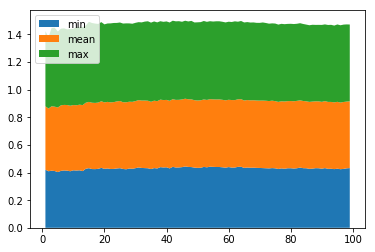

In [48]:
# Ploting library
import numpy as np
import matplotlib.pyplot as plt
 
# Data
l = len(results['mean_v'])
x=range(1,l+1)
y=[results['min_v'], results['mean_v'], results['max_v']]
 
# Plot
plt.stackplot(x,y, labels=['min','mean','max'])
plt.legend(loc='upper left')
plt.show()
